In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '../cifar10/train/'
test_path = '../cifar10/test/'

gen_train_data = ImageDataGenerator(rescale=1./255)
gen_test_data = ImageDataGenerator(rescale=1./255)

train_generator = gen_train_data.flow_from_directory(train_path, target_size=(32,32), batch_size=32, class_mode='categorical')
test_generator = gen_test_data.flow_from_directory(test_path, target_size=(32,32), batch_size=32, class_mode='categorical')

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import warnings
warnings.simplefilter('ignore')

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(68,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 105ms/step - accuracy: 0.3337 - loss: 1.7905
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5713 - loss: 1.1972
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6476 - loss: 0.9886
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.6928 - loss: 0.8652
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.7243 - loss: 0.7880
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7516 - loss: 0.7026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7717 - loss: 0.6479
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.7945 - loss: 0.5886
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.8110 - loss: 0.5449
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.8242 - loss: 0.4942


In [5]:
loss, accuracy = model.evaluate(test_generator)

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.7167 - loss: 0.8675


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted class: horse (Confidence: 0.91)


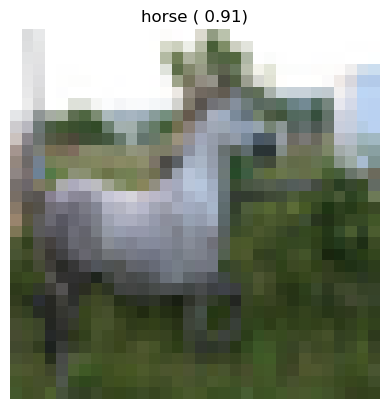

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = '../cifar10/test/horse/0008.png'

img = image.load_img(img_path, target_size=(32,32))
img_arr = image.img_to_array(img)

img_arr = img_arr / 255.0

img_arr = np.expand_dims(img_arr, axis=0)

prediction = model.predict(img_arr)

predicted_index = np.argmax(prediction)
confidence = np.max(prediction)

prediction_label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = prediction_label[predicted_index]

print(f"Predicted class: {predicted_label} (Confidence: {confidence:.2f})")

plt.imshow(img)
plt.title(f"{predicted_label} ({confidence: .2f})")
plt.axis('off')
plt.show()